In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import struct
from tensorflow.keras.utils import to_categorical



def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        data = data.reshape(num, rows * cols)
        return data / 255.0  # normalize to [0, 1]

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

X_train = load_images('C:\\Users\\user\\Desktop\\CatVNONcat\\train-images.idx3-ubyte')
y_train = load_labels('C:\\Users\\user\\Desktop\\CatVNONcat\\train-labels.idx1-ubyte')
X_test = load_images('C:\\Users\\user\\Desktop\\CatVNONcat\\t10k-images.idx3-ubyte')
y_test = load_labels('C:\\Users\\user\\Desktop\\CatVNONcat\\t10k-labels.idx1-ubyte')

y_train = to_categorical(y_train, 10).T

y_test = to_categorical(y_test, 10).T

X_train = X_train.T  # shape becomes (784, 60000)
X_test = X_test.T    # shape becomes (784, 10000)

print(X_train.shape)  # (784, 60000)
print(y_train.shape)  # (10, 60000)





(784, 60000)
(10, 60000)


Cost after iteration 0 : 2.336117340762173
Cost after iteration 100 : 0.8702994450202058
Cost after iteration 200 : 0.5467309776079899
Cost after iteration 300 : 0.44293005292122833
Cost after iteration 400 : 0.3907053760177144
Cost after iteration 500 : 0.3580933888005394
Cost after iteration 600 : 0.3349878576471249
Cost after iteration 700 : 0.31722374217411614
Cost after iteration 800 : 0.30277333292507036
Cost after iteration 900 : 0.2905589439034444
Cost after iteration 1000 : 0.2799226634078987
Cost after iteration 1100 : 0.27047781391406894
Cost after iteration 1200 : 0.2619702233942548
Cost after iteration 1300 : 0.2542257492543274
Cost after iteration 1400 : 0.24711624409303332
Cost after iteration 1500 : 0.2405370540938265
Cost after iteration 1600 : 0.23439632675781055
Cost after iteration 1700 : 0.22863311833309352
Cost after iteration 1800 : 0.2232005227145666
Cost after iteration 1900 : 0.21806795210787744
Cost after iteration 2000 : 0.2131980648964704
Cost after iterati

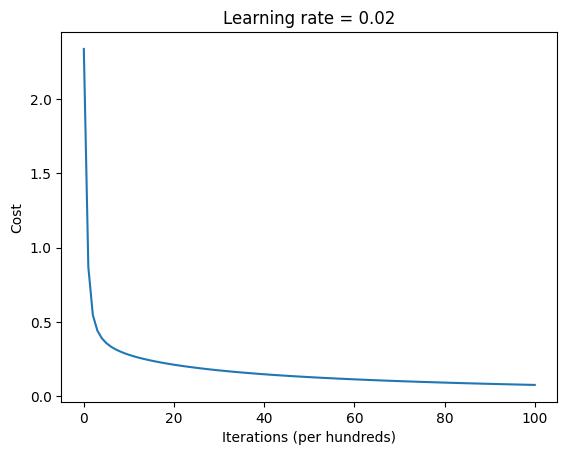

In [ ]:
layer_dims = [784,228,228,10]
parameters = L_layer_model(X_train,y_train,layer_dims,learning_rate=0.02,num_iterations=10001,print_cost=True, lambd =0.003)

In [ ]:
def softmax(Z):

  expZ = np.exp(Z - np.max(Z, axis=0, keepdims= True))

  A = expZ / np.sum(expZ, axis=0, keepdims= True)



  return A,Z


def relu(Z):

  A = np.maximum(0,Z)

  return A,Z


def sigmoid_backward(dA,cache):

  Z = cache

  s = 1/(1+np.exp(-Z))

  dZ = dA * s * (1-s)

  return dZ


def relu_backward(dA,cache):

  Z = cache

  dZ = np.array(dA, copy = True)

  dZ[Z <= 0] = 0

  return dZ

In [ ]:
def initialize_parameters_deep(layer_dims):

  np.random.seed(3)

  L = len(layer_dims)

  parameters = {}

  for l in range (1,L):

    parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * np.sqrt(2./layer_dims[l-1])

    parameters['b' + str(l)] = np.zeros((layer_dims[l],1))


  return parameters




In [ ]:
def linear_forward(A_prev,W,b ):




  Z = np.dot(W,A_prev) + b

  cache = (A_prev, W, b)

  return Z, cache


def linear_activation_forward(A_prev,W,b,activation):

  Z,linear_cache = linear_forward(A_prev,W,b)

  if activation == "relu":
    A,activation_cache = relu(Z)

  elif activation == "softmax":
    A,activation_cache = softmax(Z)

  cache = (linear_cache,activation_cache)


  return A,cache





In [ ]:
def L_model_forward(X,parameters):

  caches = []

  A = X

  L = len(parameters) // 2 # Doubt


  for l in range (1,L):
    A_prev = A
    A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation="relu")

    caches.append(cache)

  AL,cache = linear_activation_forward(A,parameters['W' + str(L)],parameters['b' + str(L)],activation="softmax")
  caches.append(cache)

  return AL,caches

In [ ]:
def compute_cost(AL,Y,parameters, lambd = 0):

  m = Y.shape[1]     # why use X at some places and Y at others to get m? why not stick to just X?

  cost = (-1/m) * np.sum(Y * np.log(AL + 1e-8))

  L2_cost = 0

  if lambd > 0:
    for l in range(1,len(parameters)//2 + 1):
        W = parameters['W' + str(l)]

        L2_cost += np.sum(np.square(W))

  L2_cost =(lambd / (2 * m)) * L2_cost

  cost = cost + L2_cost

  cost = np.squeeze(cost)

  return cost




NameError: name 'lambd' is not defined

In [ ]:
def linear_backward(dZ,cache,lambd = 0):


  A_prev,W,b = cache

  m = A_prev.shape[1]

  dW = (1/m) * np.dot(dZ,A_prev.T) + (lambd / m) * W

  db = (1/m) * np.sum(dZ, axis=1, keepdims=True)

  dA_prev = np.dot(W.T,dZ)


  return dA_prev,dW,db



In [ ]:
def linear_activation_backward(dA, cache, activation, lambd = 0):

  linear_cache,activation_cache = cache

  if activation == "relu":

    dZ = relu_backward(dA,activation_cache)

  elif activation == "softmax":

    dZ = dA

  dA_prev,dW,db = linear_backward(dZ,linear_cache,lambd = lambd)

  return dA_prev,dW,db



In [ ]:
def L_model_backward(AL, caches, Y, lambd=0):
    grads = {}
    L = len(caches)

    # Output layer (softmax)
    dZL = AL - Y
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = \
        linear_activation_backward(dZL, current_cache, "softmax", lambd=lambd)

    # Hidden layers (ReLU)
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev, dW, db = linear_activation_backward(
            grads['dA' + str(l+1)], current_cache, "relu", lambd=lambd)
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l+1)] = dW
        grads["db" + str(l+1)] = db

    return grads


In [ ]:
def update_parameters(grads,learning_rate,parameters):

  L = len(parameters) // 2

  for l in range (1,L+1):

    parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
    parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]

  return parameters

In [ ]:
def L_layer_model(X,Y,layer_dims,learning_rate=0.009,num_iterations=20001,print_cost=False,lambd = 0):

  np.random.seed(3)

  costs = []

  parameters = initialize_parameters_deep(layer_dims)

  for i in range (0,num_iterations):

    AL, caches = L_model_forward(X,parameters)

    cost = compute_cost(AL,Y,parameters,lambd)

    grads = L_model_backward(AL,caches,Y,lambd)

    parameters = update_parameters(grads,learning_rate,parameters)


    if print_cost and i % 100 == 0:
      print(f"Cost after iteration {i} : {cost}")



      costs.append(cost)
  plt.plot(np.squeeze(costs))
  plt.ylabel('Cost')
  plt.xlabel('Iterations (per hundreds)')
  plt.title("Learning rate = " + str(learning_rate))
  plt.show()
  return parameters

In [ ]:
def predict(X, y, parameters):
    AL, _ = L_model_forward(X, parameters)
    predictions = np.argmax(AL, axis=0)
    labels = np.argmax(y, axis=0)
    accuracy = np.mean(predictions == labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    return predictions,accuracy


In [ ]:
train_pred, train_acc = predict(X_train, y_train, parameters)
test_pred, test_acc = predict(X_test, y_test, parameters)

print("✅ Train accuracy:", round(train_acc * 100, 2), "%")
print("🧪 Test accuracy:", round(test_acc * 100, 2), "%")



Accuracy: 97.94%
Accuracy: 97.04%
✅ Train accuracy: 97.94 %
🧪 Test accuracy: 97.04 %
